In [19]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('C:\\Users\\SATHVIK\\OneDrive\\Desktop\\P_Analysis\\netflix_titles_nov_2019.csv')

In [21]:
df.head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie


In [22]:
df.shape

(5837, 12)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [24]:
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.describe(include='object')

,title,director,cast,country,date_added,rating,duration,listed_in,description,type
count,5837,3936,5281,5410,5195,5827,5837,5837,5837,5837
unique,5780,3108,5087,527,1092,14,194,449,5829,2
top,Love,"Raúl Campos, Jan Suter",David Attenborough,United States,"November 1, 2019",TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...,Movie
freq,3,18,18,1907,94,1937,1259,297,3,3939


In [27]:
df['director']=df['director'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')
df['country']=df['country'].fillna('Unknown')
df['rating']=df['rating'].fillna('Not Rated')


In [28]:
df['date_added'] = pd.to_datetime(df['date_added'])


In [29]:
df['date_added'] = df['date_added'].fillna(df['date_added'].median())


In [33]:
import re
text_cols = df.select_dtypes(include='object').columns
for col in text_cols:
    df[col] = df[col].str.lower()
    df[col] = df[col].str.strip()
    df[col] = df[col].apply(lambda x: re.sub(' +', ' ', str(x)))
    df[col] = df[col].str.replace(r'\s*,\s*', ', ', regex=True)
    


In [34]:
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5837 non-null   int64         
 1   title         5837 non-null   object        
 2   director      5837 non-null   object        
 3   cast          5837 non-null   object        
 4   country       5837 non-null   object        
 5   date_added    5837 non-null   datetime64[ns]
 6   release_year  5837 non-null   int64         
 7   rating        5837 non-null   object        
 8   duration      5837 non-null   object        
 9   listed_in     5837 non-null   object        
 10  description   5837 non-null   object        
 11  type          5837 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 547.3+ KB


show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
dtype: int64

In [35]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day


In [36]:
df['month_name'] = df['date_added'].dt.month_name()


In [37]:
df['main_genre'] = df['listed_in'].str.split(',').str[0]
df['second_genre'] = df['listed_in'].str.split(',').str[1]
df['genre_count'] = df['listed_in'].apply(lambda x: len(str(x).split(',')))


In [38]:
def rating_group(r):
    kids = ['G', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-Y7-FV']
    teens = ['PG', 'TV-PG', 'TV-14', 'PG-13']
    adults = ['R', 'TV-MA', 'NC-17']
    if r in kids:
        return 'Kids'
    elif r in teens:
        return 'Teens'
    elif r in adults:
        return 'Adults'
    else:
        return 'Unknown'

df['age_group'] = df['rating'].apply(rating_group)


In [39]:
df['is_movie'] = (df['type'] == 'Movie').astype(int)
df['is_tvshow'] = (df['type'] == 'TV Show').astype(int)


In [40]:
df['year_gap'] = df['year_added'] - df['release_year']


In [41]:
df['desc_length'] = df['description'].apply(lambda x: len(str(x).split()))


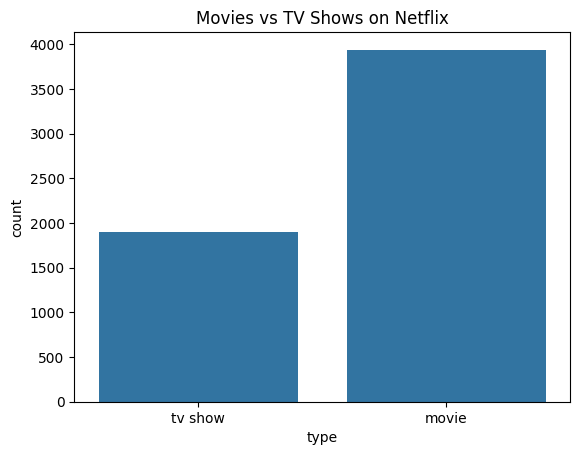

In [42]:
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()


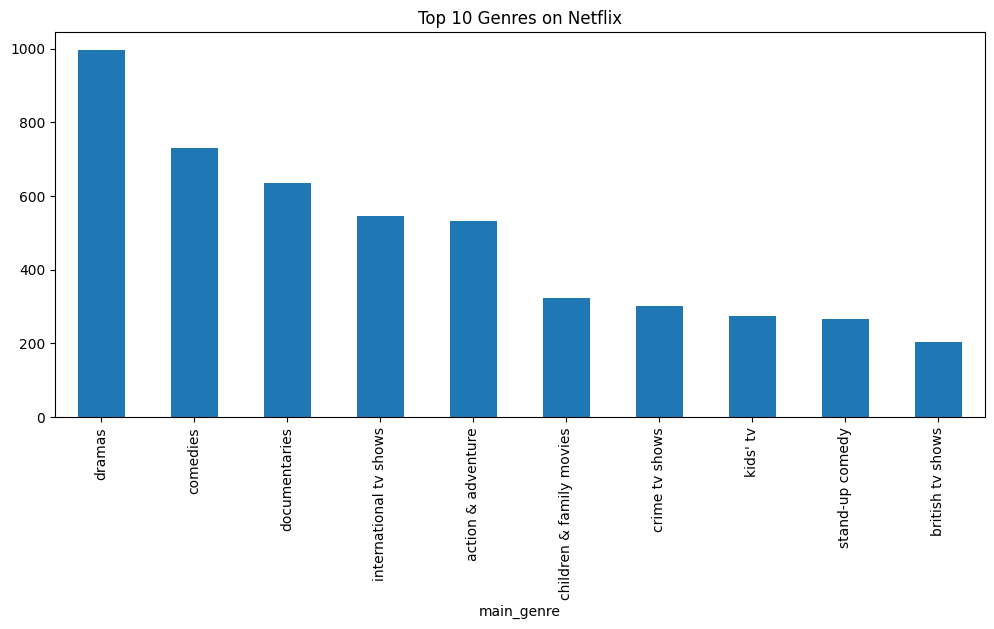

In [43]:
plt.figure(figsize=(12,5))
df['main_genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.show()


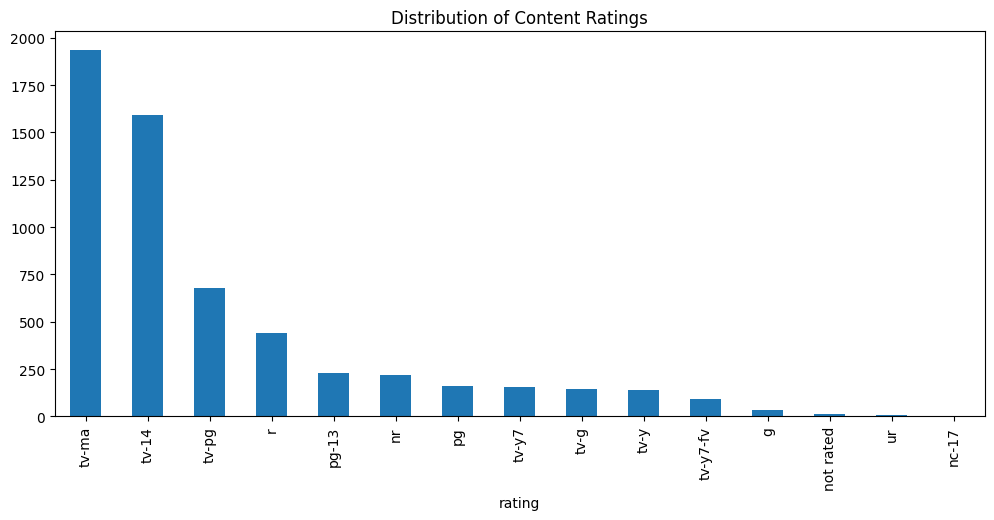

In [44]:
plt.figure(figsize=(12,5))
df['rating'].value_counts().plot(kind='bar')
plt.title("Distribution of Content Ratings")
plt.show()


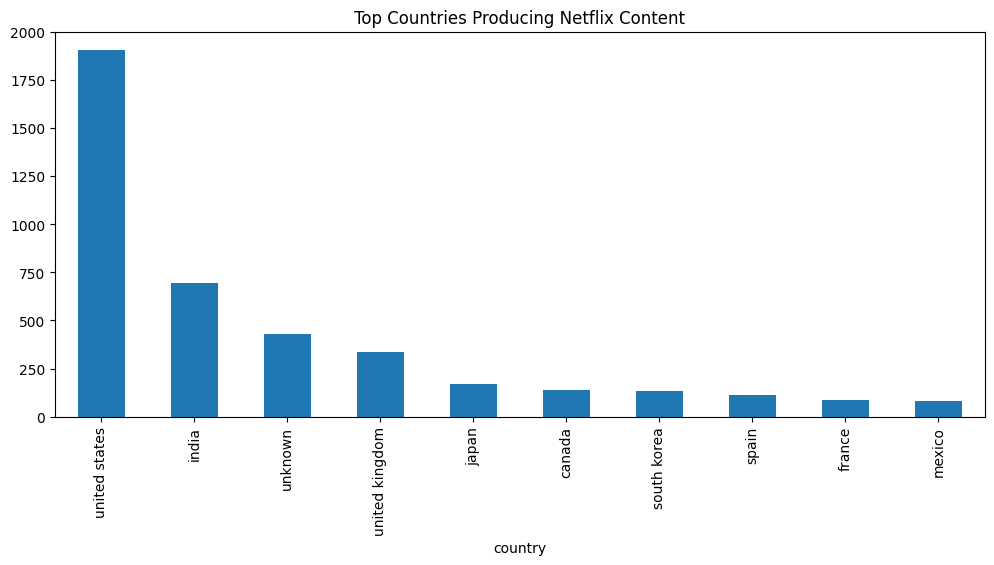

In [46]:
df['country'].value_counts().head(10).plot(kind='bar', figsize=(12,5))
plt.title("Top Countries Producing Netflix Content")
plt.show()


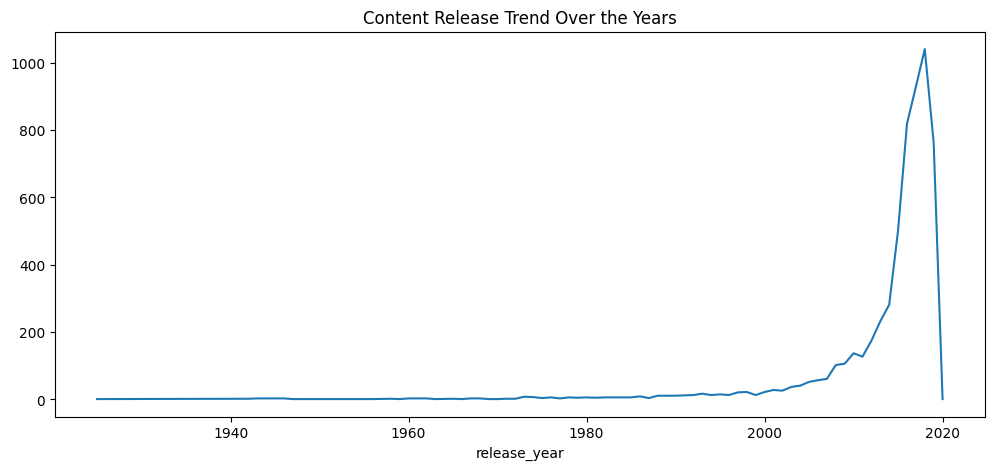

In [47]:
df['release_year'].value_counts().sort_index().plot(figsize=(12,5))
plt.title("Content Release Trend Over the Years")
plt.show()


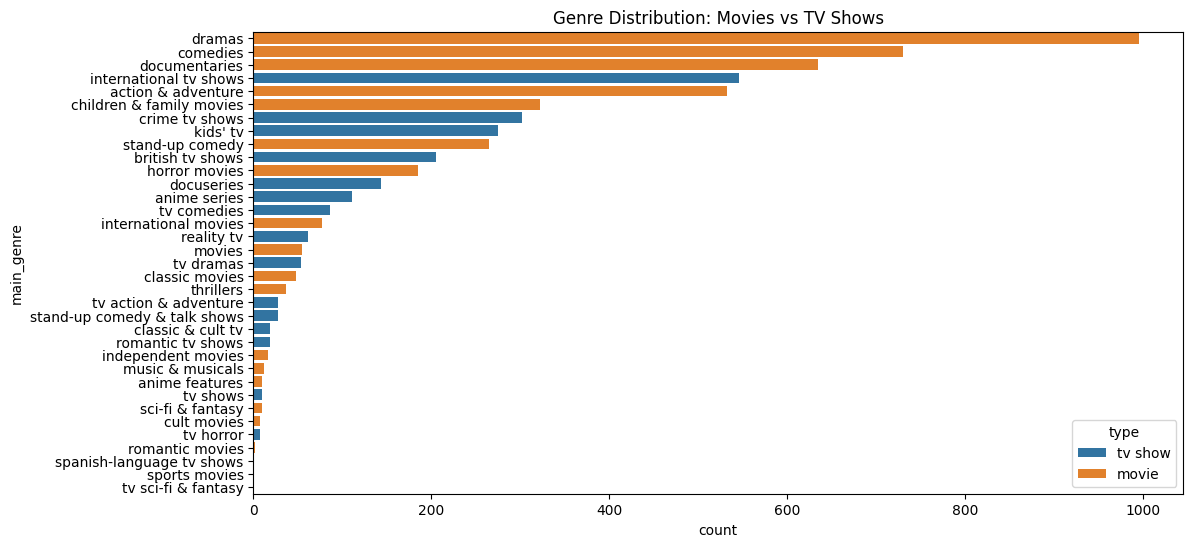

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(y='main_genre', hue='type', data=df, order=df['main_genre'].value_counts().index)
plt.title("Genre Distribution: Movies vs TV Shows")
plt.show()


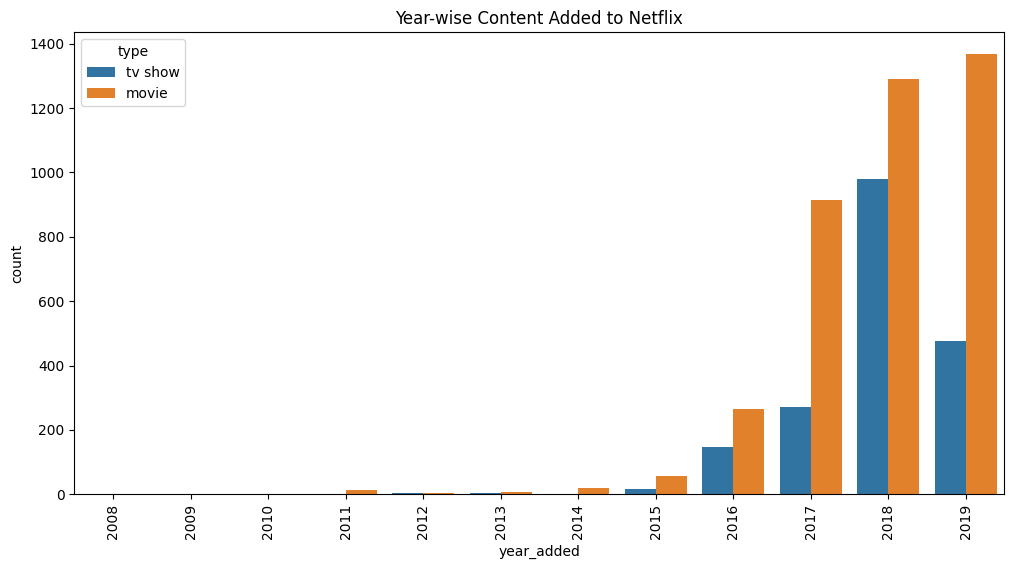

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year_added', hue='type')
plt.xticks(rotation=90)
plt.title("Year-wise Content Added to Netflix")
plt.show()


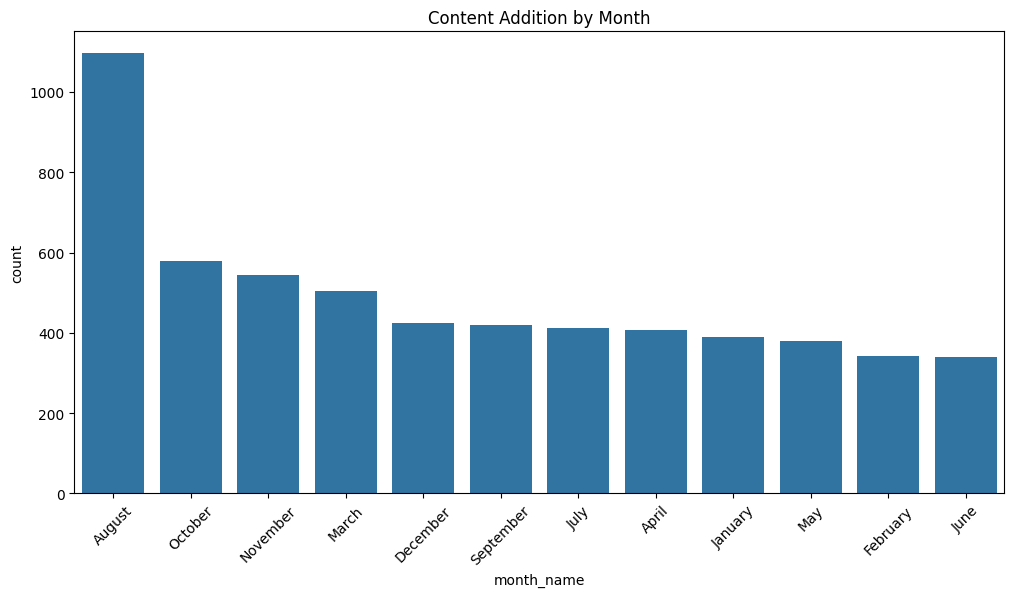

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(x='month_name', data=df, order=df['month_name'].value_counts().index)
plt.title("Content Addition by Month")
plt.xticks(rotation=45)
plt.show()


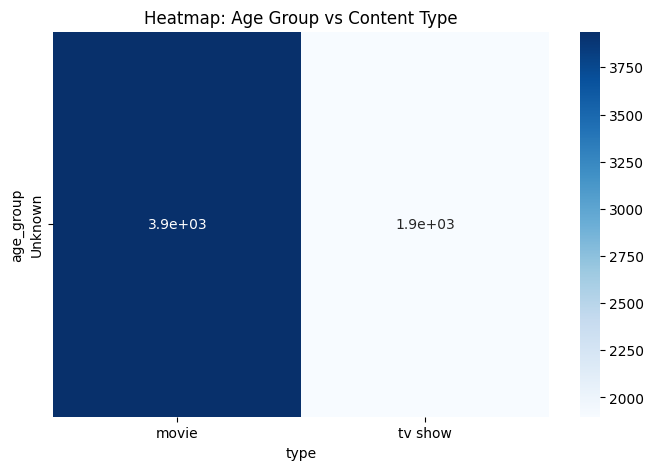

In [54]:
plt.figure(figsize=(8,5))
sns.heatmap(pd.crosstab(df['age_group'], df['type']), annot=True, cmap='Blues')
plt.title("Heatmap: Age Group vs Content Type")
plt.show()


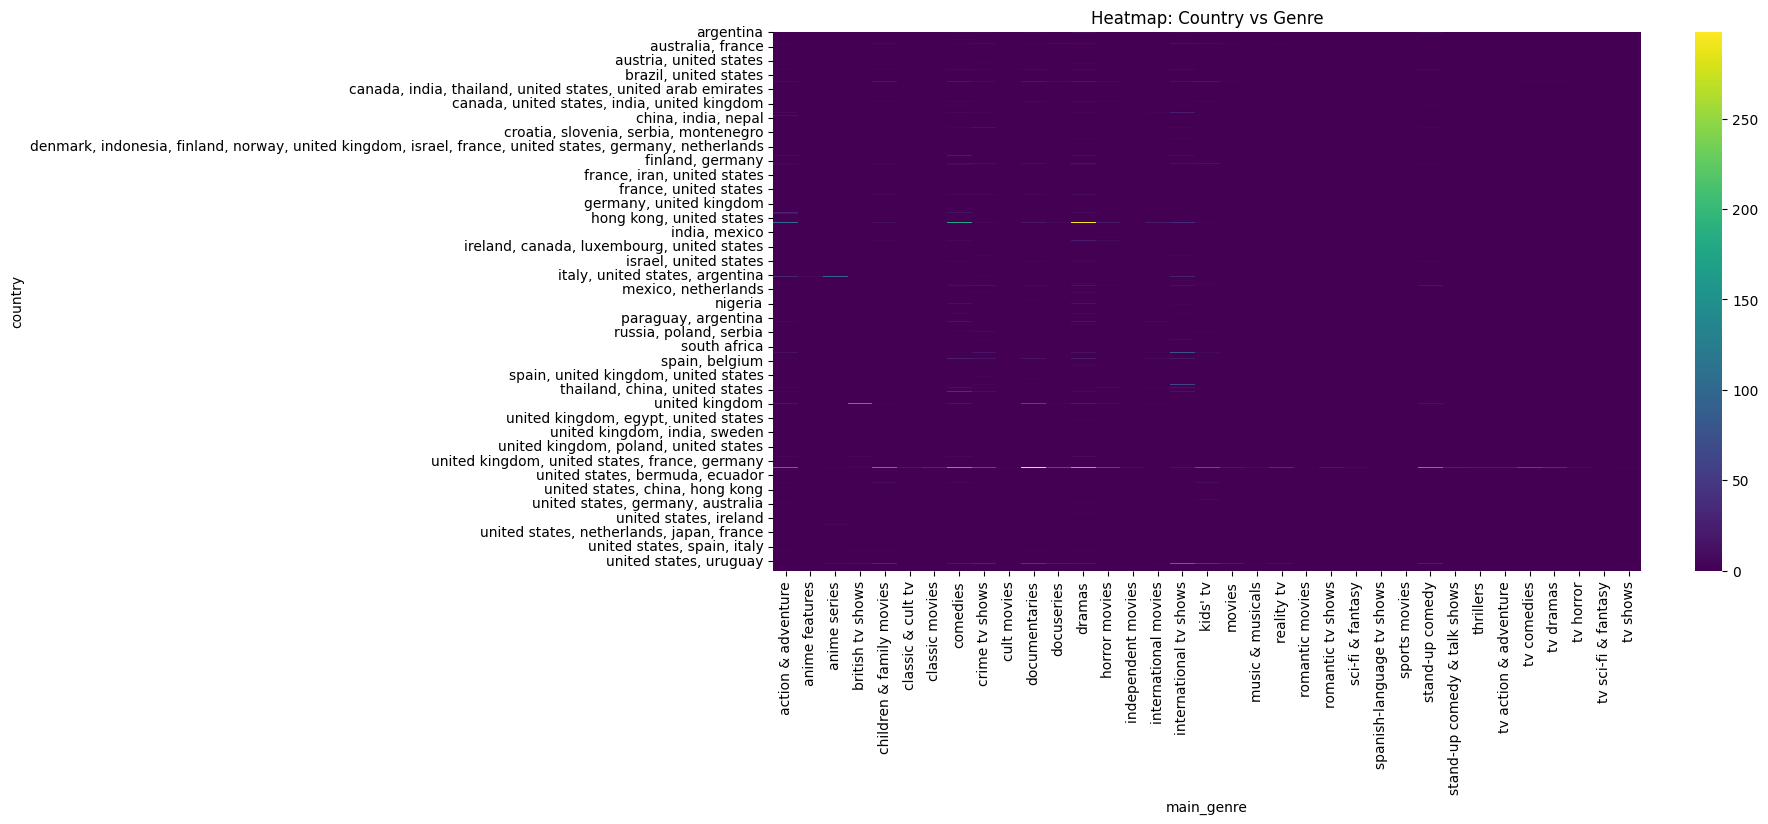

In [56]:
country_genre = pd.crosstab(df['country'], df['main_genre'])
plt.figure(figsize=(14,7))
sns.heatmap(country_genre, cmap='viridis')
plt.title("Heatmap: Country vs Genre")
plt.show()
